# Feature Scaling ACTIVIDAD
Exploremos Feature scaling en con los datos de *NBA*:
1. Genera el DataFrame de la tabla *stats*
2. Realiza limpieza, y preprocesamiento de modo que contemos con solamente los valores numericos (no nulos).
3. Analiza los resultados de análisis usando las técnicas de Escalamiento de esta sesión y reporta tus observaciones.

##P1. Escalamiento. Feature scaling con los datos del archivo

In [3]:
import pandas as pd
import missingno as msno

In [12]:
# Leer el archivo de Excel
df = pd.read_excel('NBA.xlsx', sheet_name= 'stats')

# Mostrar el DataFrame
df

,X1,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,NaN,1725.0,16.7,...,0.679,NaN,NaN,405.0,99.0,NaN,NaN,NaN,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,NaN,525.0,13.0,...,0.564,NaN,NaN,124.0,42.0,NaN,NaN,NaN,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,NaN,NaN,35.0,4.0,NaN,NaN,NaN,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,NaN,843.0,6.9,...,0.775,NaN,NaN,125.0,36.0,NaN,NaN,NaN,78.0,240.0


In [13]:

# Calcular el porcentaje de datos nulos en cada columna
missing_data = df.isnull().sum() / len(df) * 100

# Obtener las columnas con más del 80% de datos nulos
columns_to_drop = missing_data[missing_data > 80].index

print("Columnas con más del 80% de datos nulos:")
print(columns_to_drop)


Columnas con más del 80% de datos nulos:
Index(['3PAr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'blanl', 'blank2', 'OBPM', 'DBPM', 'BPM', 'VORP', '3P%', 'ORB', 'DRB',
       'STL', 'BLK', 'TOV'],
      dtype='object')


In [14]:
# Eliminar estas columnas del DataFrame
df = df.drop(columns=columns_to_drop)

print("Las columnas con más del 80% de datos nulos han sido eliminadas.")


Las columnas con más del 80% de datos nulos han sido eliminadas.


<Axes: >

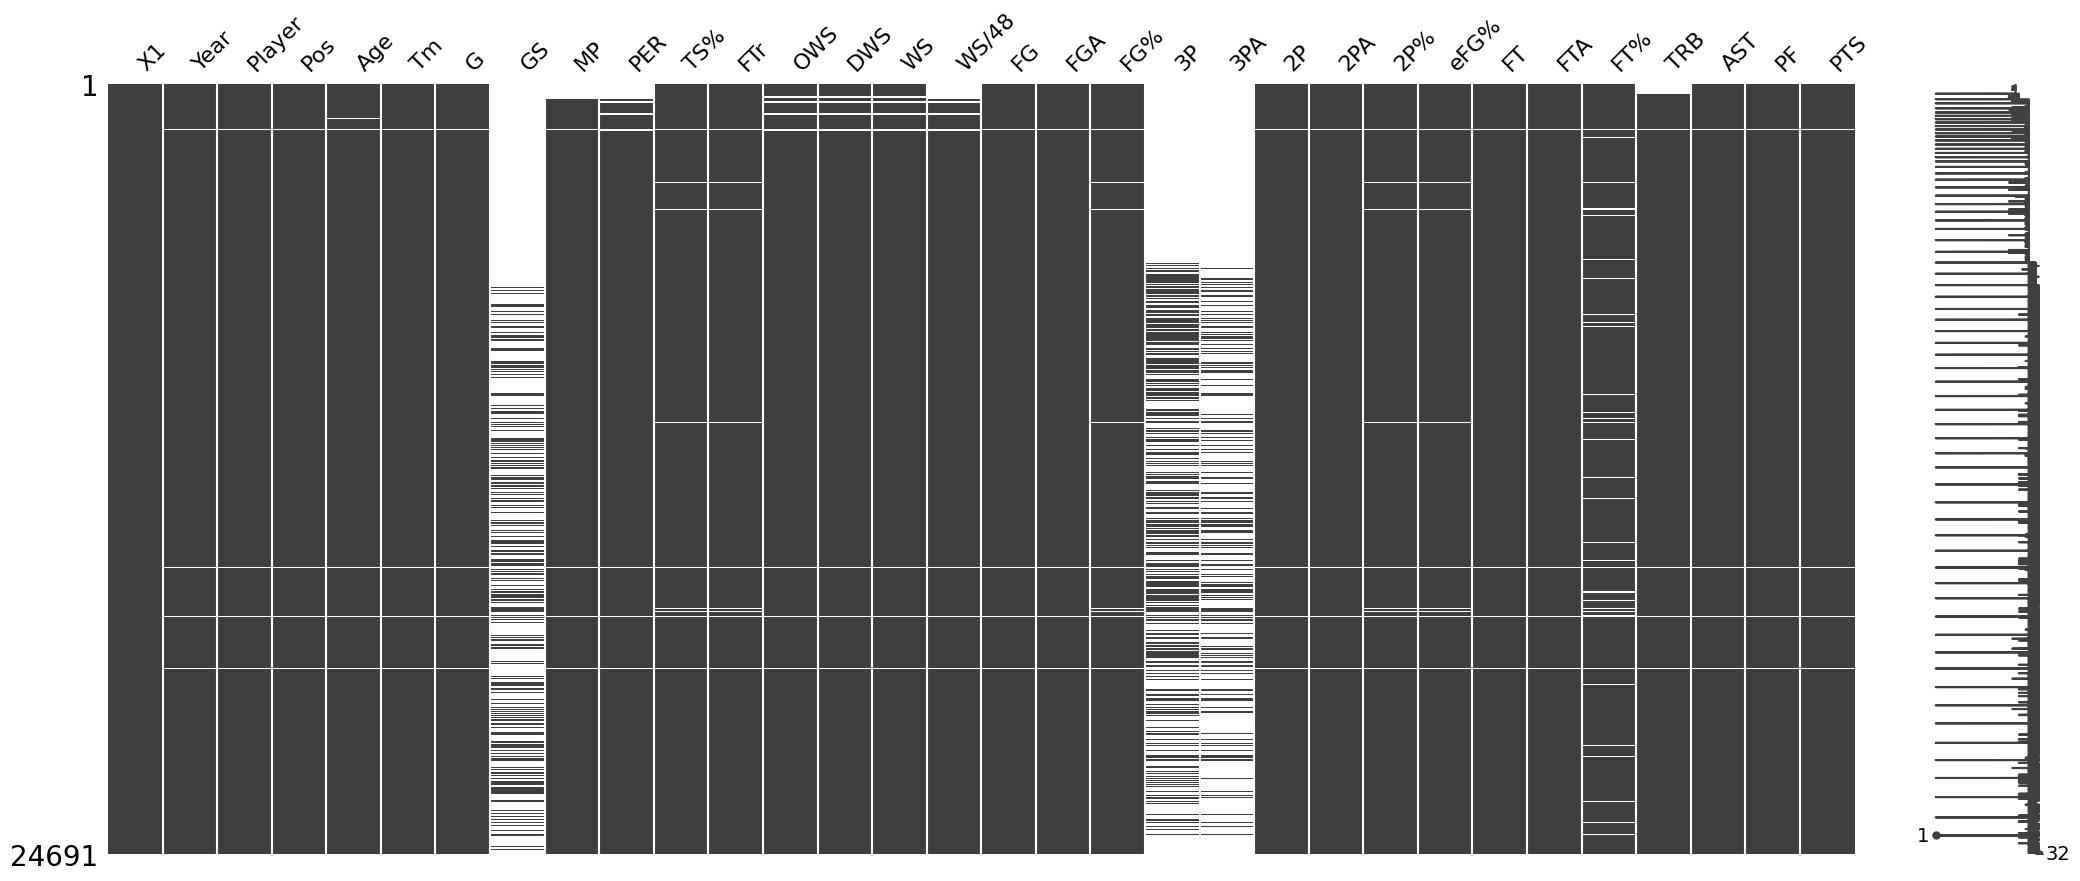

In [15]:
msno.matrix(df)


In [16]:
#Eliminando datos nulos de las columnas con datos numericos
df.isnull().sum()
df.dropna(inplace = True)
df.isnull().sum()

X1        0
Year      0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
PER       0
TS%       0
FTr       0
OWS       0
DWS       0
WS        0
WS/48     0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
TRB       0
AST       0
PF        0
PTS       0
dtype: int64

<Axes: >

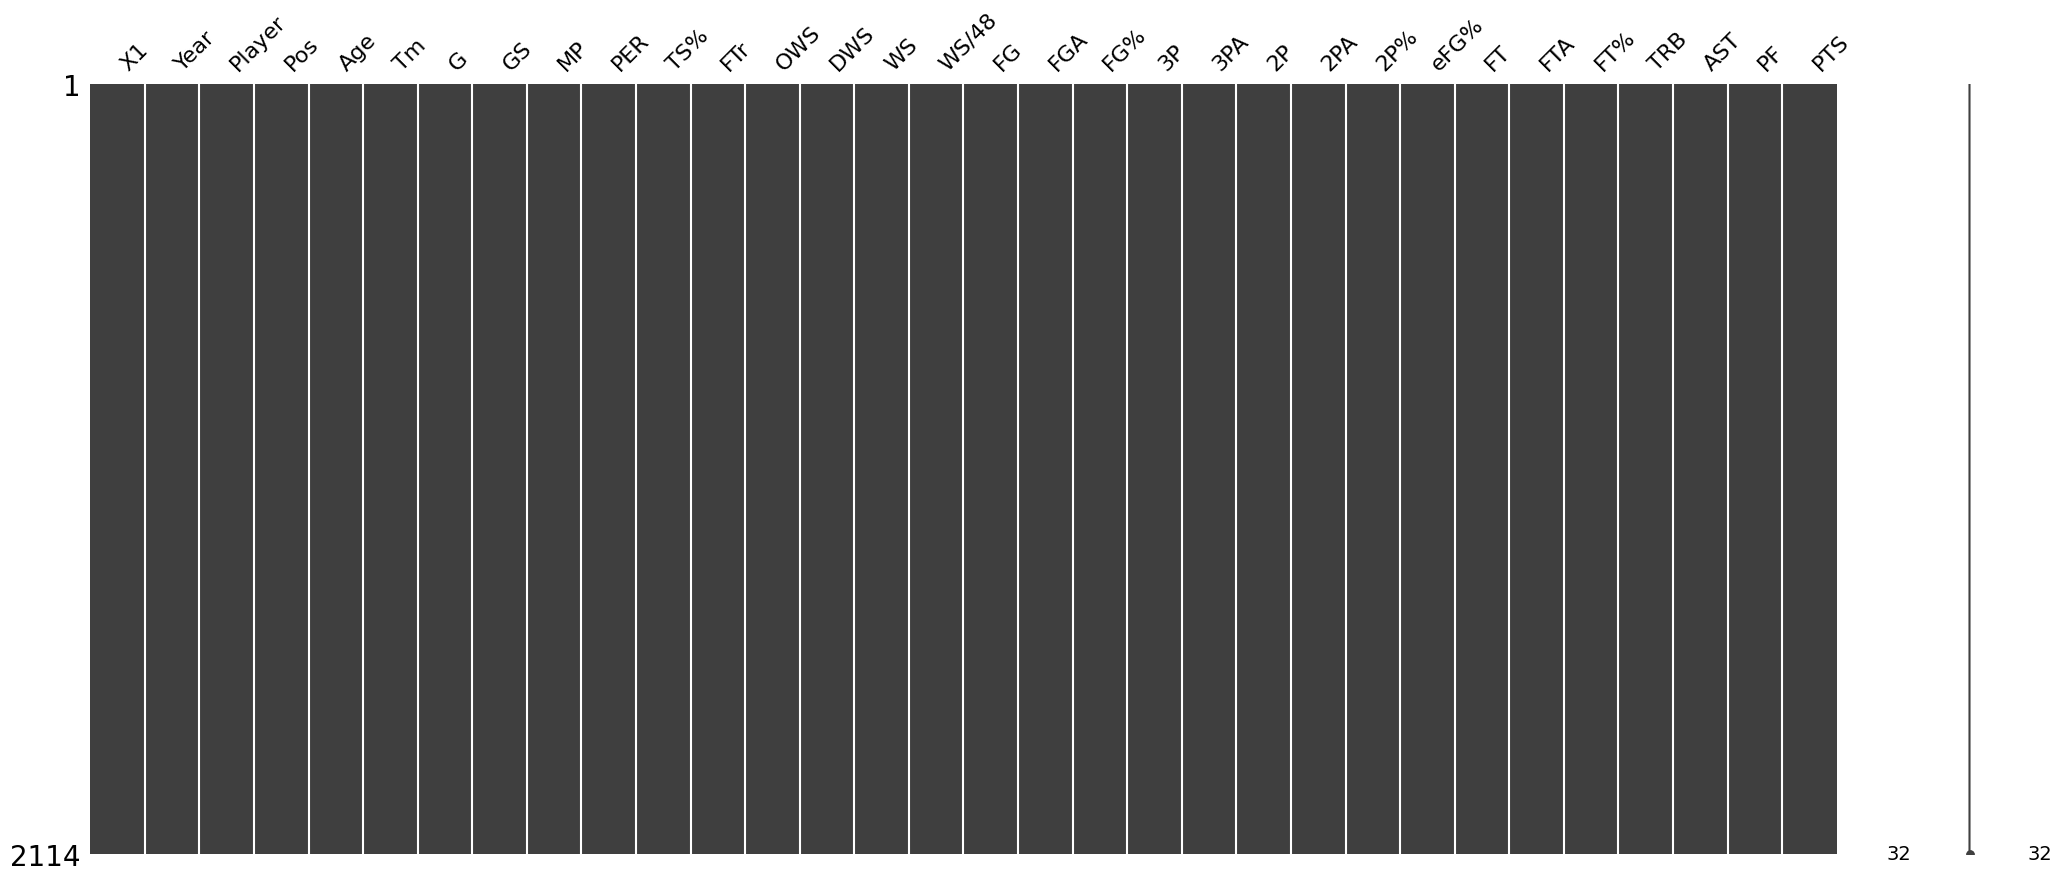

In [17]:
msno.matrix(df)

##Escalamiento

In [19]:
df.columns

Index(['X1', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER',
       'TS%', 'FTr', 'OWS', 'DWS', 'WS', 'WS/48', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'TRB', 'AST',
       'PF', 'PTS'],
      dtype='object')

In [20]:
# Calcular la media de cada columna
mean = df.mean()
print("Media de cada columna:")
print(mean)

# Calcular la mediana de cada columna
median = df.median()
print("\nMediana de cada columna:")
print(median)

# Calcular el mínimo de cada columna
min_values = df.min()
print("\nMínimo de cada columna:")
print(min_values)

# Calcular el máximo de cada columna
max_values = df.max()
print("\nMáximo de cada columna:")
print(max_values)

# Calcular la desviación estándar de cada columna
std_dev = df.std()
print("\nDesviación estándar de cada columna:")
print(std_dev)


TypeError: Could not convert ["Eric FernstenEric FernstenJames BaileyJames BaileyJames BaileyMel BennettAlex BradleyCharles BradleyRoger BurkmanDavid BurnsDavid BurnsDavid BurnsReggie CarterHollis CopelandGeoff CromptonBob DandridgeRon DavisLarry DemicCoby DietrickJames DonaldsonTerry DuerodEric FernstenDon FordPaul GriffinGlenn HaganSteve HayesSteve HayesSteve HayesKeith HerronBrad HollandTracy JacksonTracy JacksonTracy JacksonClay JohnsonJohn JohnsonVinnie JohnsonClarence KeaToby KnightJoel KramerKevin KunnertSam LaceyJeff LampRock LeeLewis LloydJohn McCulloughHank McDowellLarry NanceJawann OldhamSonny ParkerKevin RestaniKevin RestaniJackie RobinsonDave RobischDeWayne ScalesCraig SheltonLarry SpriggsRay TolbertRay TolbertDanny VranesMike WoodsonRich YonakorDwight AndersonJ.J. AndersonJames BaileyBilly RayRickey BrownJoe CooperGeoff CromptonMike DavisKenny DennardCoby DietrickLeon DouglasJames EdwardsLen ElmoreChris EnglerCalvin GarrettMike GminskiJohn GreigPaul GriffinScott HastingsGeorge JohnsonJim JohnstoneJim JohnstoneJim JohnstoneBobby JonesDwight JonesHutch JonesRich KelleyLarry KenonJoe KopickiSteve LingenfelterScott LloydDave MagleyScott MayBob McAdoo*Hank McDowellSteve MixPaul MokeskiGuy MorganSwen NaterChuck NevittAudie NorrisJawann OldhamBilly PaultzBilly PaultzBilly PaultzCharles PittmanKevin PorterEd RainsDave RobischDanny SchayesJim SmithRobert SmithRobert SmithLarry SpriggsVince TaylorDarren TillisRay TolbertJan VanPete VerhoevenMarvin WebsterRory WhiteJames WilkesBill WilloughbyJames BaileyTom BoswellCharles BradleyWallace BryantCharlie CrissGeoff CromptonRussell CrossEarl CuretonKeith EdmonsonKeith EdmonsonKeith EdmonsonFranklin EdwardsCraig EhloChris EnglerEric FernstenJohn GarrisMike GibsonSidney GreenSteve HayesTracy JacksonClay JohnsonBobby JonesCharles JonesHutch JonesMark JonesEddie JordanGreg KiteBruce KuczenskiBruce KuczenskiMark LandsbergerSteve LingenfelterRudy MacklinWes MatthewsLarry MicheauxSwen NaterEd NealyAudie NorrisJawann OldhamRoger PhegleyJohn PinoneTom PiotrowskiAnthony RobertsDave RobischDave RobischDave RobischLorenzo RomarMike SandersDeWayne ScalesDavid ThirdkillDavid Thompson*Ray TolbertPete VerhoevenBrant WeidnerMark WestRory WhiteJerome WhiteheadKevin WilliamsSam WilliamsMichael WilsonRandy BreuerRon BrewerSteve BurttTony CampbellDon CollinsJoe CooperCharles DavisJerry EavesKenton EdelinFranklin EdwardsChris EnglerChris EnglerKenny FieldsStewart GrangerButch GravesStuart GrayScott HastingsSteve HayesGeoff HustonClemon JohnsonGeorge JohnsonCharles JonesEdgar JonesMajor JonesGreg KelserBilly KnightTom LaGardeRonnie LesterSidney LoweSidney LowePace MannionBob McAdoo*Scooter McCrayHank McDowellMark McNamaraMark McNamaraMark McNamaraLarry MicheauxJay MurphyKenny NattKenny NattEd NealyChuck NevittJawann OldhamBilly PaultzJim PetersenDavid PopeFred RobertsFred RobertsFred RobertsRick RobeyTruck RobinsonCampy RussellWayne SappletonDanny SchayesTom SchefflerBrook SteppeDane SuttleDavid ThirdkillDavid ThirdkillLinton TownesPete VerhoevenMark WestJeff WilkinsDale WilkinsonDale WilkinsonMichael WilsonMichael WilsonMichael WilsonUwe BlabRon BrewerWallace BryantAntoine CarrButch CarterButch CarterButch CarterBill CartwrightLorenzo CharlesJeff CookJeff CookJeff CookDavid CookeTyrone CorbinRon CrevierRon CrevierJeff CrossDevin DurrantMike GibsonMike GlennKen GreenKenny GreenKenny GreenKenny GreenSteve HayesRod HigginsGeorge JohnsonGeorge JohnsonKen JohnsonEarl JonesHarold KeelingMitch KupchakBrian MartinBrian MartinBob McAdoo*Ben McDonaldHank McDowellBilly McKinneyPaul MokeskiChuck NevittChuck NevittChuck NevittDavid PopeBlair RasmussenDerrick RowlandAlex StivrinsDavid ThirdkillJim ThomasSedric ToneyJeff TurnerNick VanosGranville WaitersEnnis WhatleyEnnis WhatleyEnnis WhatleyJeff WilkinsGuy WilliamsWalter BerryJoe BinionUwe BlabFrank BrickowskiMike BrittainMichael BrooksDon CollinsBruce DouglasGreg DreilingKevin DuckworthKevin DuckworthKevin DuckworthJerry EavesChris EnglerChris EnglerChris EnglerChris EnglerDave FeitlKenny FieldsMike GlennStuart GrayKenny GreenCedric HendersonCedric HendersonCedric HendersonJerome HendersonKevin HendersonMyron JacksonAnthony JonesCurtis KitchenGreg KiteJim LampleyKeith LeeBill MartinFernando MartinCedric MaxwellHank McDowellMark McNamaraJay MurphyCalvin NattChuck NevittMark OlberdingBen PoquetteDennis Rodman*Ron RowanJeff TaylorDavid ThirdkillBilly ThompsonMychal ThompsonMelvin TurpinBill Walton*Marvin WebsterJerome WhiteheadMichael WilsonMichael WilsonBrad WrightPerry YoungPerry YoungJoe ArlauckasWilliam BedfordKent BensonUwe BlabMichael BrooksSteve ColterJeff CookWinston CriteDarryl DawkinsDarryl DawkinsDarryl DawkinsGreg DreilingChris DudleyT.R. DunnChris EnglerKenny FieldsLancaster GordonStuart GrayDave HendersonKevin HendersonDave HoppenCharles JonesGreg KiteRalph LewisBill MartinChris McNealyAndre MooreAndre MooreAndre MooreRon MooreRon MooreRon MooreJay MurphyTod MurphyMartin NessleyMartin NessleyMartin NessleyChuck NevittMike O'KorenLouis OrrMichael PhelpsRichard RellfordBrian RowsomBilly ThompsonBob ThorntonRay TolbertRay TolbertRay TolbertElston TurnerGranville WaitersChris WashburnChris WashburnChris WashburnKermit WashingtonChris WelpEnnis WhatleyClinton WheelerTony WhiteNikita WilsonRicky WilsonRickie WinslowPhil ZevenbergenMark AcresRandy AllenGreg BallardUwe BlabRon CavenallMark DavisDarryl DawkinsT.R. DunnWayne EnglestadRolando FerreiraDuane FerrellKenny GattisonBen GilleryOrlando GrahamHarvey GrantStuart GrayJack HaleySteve HarrisTito HorfordPhil HubbardAnthony JonesBill JonesShelton JonesTim KemptonBart KofoedEric LecknerRob LockJohn LongBen McDonaldMark McNamaraTodd MitchellTodd MitchellTodd MitchellPete MyersCalvin NattCalvin NattCalvin NattEd NealyChuck NevittWill PerdueDave PopsonDave PopsonDave PopsonDominic PressleyRamon RivasJim RowinskiJim RowinskiJim RowinskiBrian RowsomCharles ShacklefordKeith SmartRay TolbertChris WelpEnnis WhatleyClinton WheelerClinton WheelerClinton WheelerEric WhiteEric WhiteJerome WhiteheadKevin WilliamsOrlando WoolridgeKen BannisterUwe BlabAdrian BranchRaymond BrownStanley BrundyMark BryantTorgeir BrynSteve BucknallGreg ButlerAdrian CaldwellDerrick ChievousBen ColemanPat CummingsTerry DozierGreg DreilingDuane FerrellDave GreenwoodJack HaleySteve HarrisMike HigginsMike HigginsMike HoltonTito HorfordSteve JohnsonSteve JohnsonNate JohnstonStan KimbroughAndrew LangJeff LeboEric LecknerTim LeglerGary LeonardJim LesJim LesRalph LewisRalph LewisAlton ListerLewis LloydLewis LloydAnthony MasonWes MatthewsBob McCannMel McCantsTim McCormickCarlton McKinneyMark McNamaraScott MeentsPaul MokeskiPete MyersCalvin NattKurt NimphiusDyron NixJawann OldhamJawann OldhamJawann OldhamZarko PaspaljDoug RothJim RowinskiDonald RoyalJeff SandersJohn ShaskyJerry SichtingGreg StokesLeonard TaylorAndre TurnerJay VincentChris WelpMicheal WilliamsMike WilliamsMike WilliamsHaywoode WorkmanAlaa AbdelnabyGreg AndersonMichael AnsleyVincent AskewMilos BabicCedric BallMark BryantGreg ButlerAdrian CaldwellElden CampbellJoe BarryDerrick ChievousRichard CoffeyWayne CooperDave CorzinePat CummingsEarl CuretonQuintin DaileyByron DinkinsByron DinkinsJim FarmerDan GodfreadStuart GrayMike HigginsRoy HinsonDave HoppenDave HoppenLes JepsenBart KofoedEric LecknerClifford LettIan LockhartAnthony MasonTony MassenburgScott MeentsChris MunkPete MyersDan O'SullivanWalter PalmerOlden PolyniceDave PopsonLarry RobinsonTree RollinsJohn SalleyJeff SandersSteve SchefflerJohn ShaskyCharles SmithClinton SmithDerek SmithMike SmrekMike SmrekMike SmrekEverette StephensIrving ThomasBob ThorntonStojko VrankovicDoug WestEddie LeeMike WoodsonHoward WrightHoward WrightHoward WrightHoward WrightA.J. WynderAlaa AbdelnabyMichael AnsleyMichael AnsleyIsaac AustinMilos BabicThurl BaileyKenny BattleKenny BattleKenny BattleChucky BrownMike BrownJud BuechlerJud BuechlerJud BuechlerMarty ConlonAnthony CookWayne CooperTom CopaQuintin DaileyJames DonaldsonLeRon EllisDave FeitlTellis FrankTom GarrickRon GrandisonGreg GrantSidney GreenSean HigginsDave HoppenJaren JacksonLes JepsenJerome LaneJerome LaneGary LeonardAnthony MasonTony MassenburgTony MassenburgTony MassenburgTony MassenburgBob McCannTim McCormickJohn MortonAlan OggKeith OwensDave PopsonDavid RiversCliff RobinsonJeff SandersMike SandersSteve SchefflerSteve SchefflerSteve SchefflerBrad SellersDerek StrongStephen ThompsonStephen ThompsonBob ThorntonJohn TurnerStojko VrankovicMitchell WigginsRandy WittmanAlaa AbdelnabyEric AndersonVincent AskewJohn BagleyKenny BattleWilliam BedfordBenoit BenjaminRandy BreuerTerry CatledgeLester ConnerJoe CourtneyJoe CourtneyJoe CourtneyTerry CummingsRadisav CurcicBison DeleJames DonaldsonPat DurhamJames EdwardsGreg FosterMike GminskiSidney GreenTom HammondsDave HoppenStephen HowardThomas JordanTim KemptonRich KingGreg KiteBart KofoedLarry KrystkowiakMoses Malone*Anthony MasonIsaiah MorrisDan O'SullivanDan O'SullivanAlan OggAlan OggAlan OggWalter PalmerAnthony PullardKurt RambisJ.R. ReidLarry RobinsonJeff RulandJeff SandersDwayne SchintziusReggie SmithAlex StivrinsTerry TeagleLaSalle ThompsonDarrell WalkerMarcus WebbRobert WerdannHerb WilliamsJoe WolfJoe WolfJoe WolfOrlando WoolridgeHoward WrightAlaa AbdelnabyGary AlexanderGary AlexanderGary AlexanderIsaac AustinJohn BagleyChucky BrownEvers BurnsAntoine CarrBen ColemanMarty ConlonAnthony CookAnthony CookJoe CourtneyEarl CuretonDell DempsDoug EdwardsLeRon EllisAlphonso FordGreg FosterMike GminskiRicky GraceAndres GuibertJay GuidingerJack HaleyCarl HerreraDonald HodgeStephen HowardDave JamersonDave JamersonDave JamersonDave JohnsonCharles JonesAdam KeefeTim KemptonTim KemptonTim KemptonRich KingGreg KiteMarcus LibertyTodd LichtiRick MahornMoses Malone*Roy MarbleBob MartinTracy MooreTod MurphyTod MurphyDan O'SullivanGerald PaddioGerald PaddioGerald PaddioKurt RambisTree RollinsDanny SchayesSteve SchefflerLaBradford SmithAndre SpencerAndre SpencerAndre SpencerLarry StewartKevin ThompsonLaSalle ThompsonSedric ToneyMatt WenstromAaron WilliamsCorey WilliamsJayson WilliamsGreg AndersonJames BlackwellJames BlackwellMike BrownAdrian CaldwellBill CurleyAntonio DavisRichard DumasDoug EdwardsJames EdwardsLaPhonso EllisKenny GattisonTate GeorgeJack HaleyGeert HamminkJerome HarmonTony HarrisJay HumphriesCharles JonesAdam KeefeRich KingGreg KiteGreg KiteNegele KnightAntonio LangCliff LevingstonJim McIlvaineIvano NewbillJulius NwosuBrian OliverMike PeplowskiDerrick PhelpsKurt RambisEldridge RecasnerSteve SchefflerReggie SlaterMark StricklandAaron SwinsonZan TabakKeith TowerKenny WalkerAaron WilliamsMicheal WilliamsTrevor WilsonCorey BeckElmer BennettMuggsy BoguesAnthony BonnerMarques BraggMike BrownJason CaffeyAdrian CaldwellCharles ClaxtonJoe CourtneyRastko CvetkovicTerry DavisAndrew DeClercqKevin DuckworthJames EdwardsLeRon EllisMatt FishMatt FishMatt FishChris GatlingGerald GlassRon GrandisonJack HaleyThomas HamiltonGeert HamminkGeert HamminkGeert HamminkAlvin HeggsDarryl JohnsonCharles JonesReggie JordanFrankie KingStacey KingRick MahornJeff MaloneRich ManningTodd MundtTodd MundtHoward NathanMike PeplowskiMike PeplowskiTim PerryKevin PritchardTerrence RencherSean RooksStefano RusconiJohn SalleyReggie SlaterReggie SlaterReggie SlaterMichael SmithElmore SpencerElmore SpencerBob ThorntonKeith TowerDavid VaughnRobert WerdannDwayne WhitfieldMonty WilliamsMonty WilliamsMonty WilliamsTrevor WilsonDavid WoodDerrick AlstonAshraf AmayaVincent AskewMark BradtkeChucky BrownMike BrownAdrian CaldwellJimmy CarruthJoe CourtneyJoe CourtneyEarl CuretonBen DavisAndrew DeClercqBison DeleDell DempsAcie EarlJamie FeickChris GatlingDevin GrayDevin GrayDevin GrayJack HaleyDarvin HamDarrin HancockDarrin HancockDarrin HancockAntonio HarveyAlan HendersonStephen HowardStephen HowardStephen HowardReggie JordanReggie JordanReggie JordanAdam KeefeTim KemptonJimmy KingStacey KingStacey KingStacey KingJoe KleineLarry KrystkowiakPriest LauderdaleEric LecknerEric LecknerRich ManningOliver MillerGaylon NickersonJermaine O'NealCherokee ParksEd PinckneyFred RobertsDonald RoyalKevin SalvadoriSteve SchefflerBrent ScottShawnelle ScottMark StricklandLaSalle ThompsonLaSalle ThompsonLaSalle ThompsonKeith TowerBen WallaceRobert WerdannAaron WilliamsAaron WilliamsJerome WilliamsLorenzo WilliamsReggie WilliamsGeorge ZidekB.J. ArmstrongBenoit BenjaminMuggsy BoguesKeith BoothTom ChambersKeith ClossMarty ConlonTerry CummingsBill CurleyYinka DareTony DelkAdonal FoyleJack HaleyCarl HerreraStephen HowardCharles JonesReggie JordanJoe KleineAndrew LangAntonio LangPriest LauderdaleJason LawsonRandy LivingstonRick MahornXavier McDanielAnthony MillerLawrence MotenPete MyersJeff NordgaardBrian OliverKevin OllieKevin OllieKevin OllieScot PollardVitaly PotapenkoCarlos RogersRoy RogersRoy RogersRoy RogersSean RooksDonald RoyalClifford RozierKevin SalvadoriShawnelle ScottDickey SimpkinsDickey SimpkinsEric SnowFelton SpencerKebu StewartEd StokesCarl ThomasJohn ThomasKurt ThomasDavid VaughnDavid VaughnSpud WebbMark WestDonald WhitesideHerb WilliamsTravis WilliamsDontonio WingfieldSharone WrightGeorge ZidekAnthony AventCorey BeckCorey BeckCorey BeckMario BennettCorie BlountWillie BurtonMarcus CambyElden CampbellAntoine CarrKelvin CatoDuane CauswellKeon ClarkKeith ClossJohn CokerMarty ConlonJohn CrottyTerry CummingsAntonio DavisBen DavisMark DavisAndrew DeClercqMichael DoleacDuane FerrellAdonal FoyleTom HammondsSteve HensonCarl HerreraCarl HerreraCarl HerreraSam JacobsonJerome JamesReggie JordanChris KingGerard KingNegele KnightAntonio LangRandy LivingstonRick MahornSean MarksJelani McCoyJim McIlvaineDerrick McKeyAnthony MillerNazr MohammedMikki MooreMakhtar N'DiayeRasho NesterovicCharles O'BannonJermaine O'NealKevin OllieKevin OllieKevin OllieWill PerdueElliot PerryRodrick RhodesStanley RobertsCarlos RogersMalik RoseJason SasserDanny SchayesDwayne SchintziusRony SeikalyAlvin SimsBrian SkinnerReggie SlaterFelton SpencerRyan StackMark StricklandDavid VaughnMark WestJahidi WhiteGerald WilkinsHerb WilliamsMonty WilliamsScott WilliamsScott WilliamsShammond WilliamsTravis WilliamsJoe WolfEtdrick BohannonEtdrick BohannonCalvin BoothCal BowdlerIra BowmanAntoine CarrTerry CummingsBill CurleyBill CurleyKornel DavidObinna EkezieJeff FosterArmen GilliamTom HammondsAntonio HarveyMark HendricksonMark HendricksonMark HendricksonRick HughesJermaine JacksonSam JacobsonTim JamesHarold JamisonKevin JohnsonReggie JordanLari KetnerLari KetnerLari KetnerJoe KleineTravis KnightAntonio LangAntonio LangAntonio LangSean MarksTony MassenburgEric MontrossMikki MooreKevin OllieAleksandar RadojevicDon ReidStanley RobertsRoy RogersFelton SpencerRyan StackMichael StewartBruno SundovZan TabakJamel ThomasWayne TurnerBill WenningtonTim YoungDalibor BagaricEtdrick BohannonMark BryantKeon ClarkJason CollierBill CurleyKornel DavidKornel DavidRicky DavisTerry DavisObinna EkezieObinna EkeziePervis EllisonJamie FeickTodd FullerRuben GarcesRuben GarcesZendon HamiltonTom HammondsAntonio HarveyDonnell HarveySam JacobsonGarth JosephGarth JosephBrevin KnightTravis KnightDan LanghiArt LongDan McClintockStanislav MedvedenkoJerome MoisoEric MontrossMamadou N'DiayeLee NailonKevin OllieOlumide OyedejiCherokee ParksWill PerdueJ.R. ReidCarlos RogersSoumaila SamakePepe SanchezPepe SanchezShawnelle ScottJabari SmithFelton SpencerMichael StewartMark StricklandRod StricklandLoy VaughtLoy VaughtLoy VaughtJerome WilliamsTariq Abdul-WahadJohn AmaechiCarlos ArroyoDalibor BagaricMark BlountRuben Boumtje-BoumtjeChucky BrownDamone BrownErnest BrownJason CaffeySamuel DalembertDeSagana DiopObinna EkezieAlton FordDean GarrettDean GarrettMatt GeigerSteve GoodrichDonnell HarveyAlan HendersonMarc JacksonMarc JacksonMarc JacksonTim JamesAvery JohnsonTravis KnightAmal McCaskillJelani McCoyMamadou N'DiayeKevin OllieBo OutlawOlumide OyedejiCherokee ParksMike PenberthyElliot PerryZach RandolphEldridge RecasnerEldridge RecasnerMichael RuffinJeryl SasserAnsu SesayReggie SlaterReggie SlaterReggie SlaterJabari SmithLeon SmithMichael StewartBruno SundovEtan ThomasRobert TraylorJeff TrepagnierRatko VardaTariq Abdul-WahadJohn AmaechiRobert ArchibaldDalibor BagaricMaceo BastonPrimoz BrezecDevin BrownRandy BrownTierre BrownMark BryantMark BryantMark BryantElden CampbellElden CampbellElden CampbellBrian CardinalMateen CleavesDeSagana DiopMichael DoleacAlton FordDanny FortsonAdonal FoyleLawrence FunderburkeAnthony GoldwireZendon HamiltonNate HuffmanRyan HumphreyRyan HumphreyRyan HumphreyJermaine JacksonMarc JacksonKen JohnsonPopeye JonesTravis KnightRandy LivingstonArt LongSean MarksTony MassenburgAmal McCaskillNazr MohammedJerome MoisoMikki MooreMikki MooreLee NailonCharles OakleyKevin OllieScot PollardDon ReidSoumaila SamakeKenny SatterfieldReggie SlaterCharles SmithMichael StewartEtan ThomasCezary TrybanskiJake VoskuhlAaron WilliamsRuben WolkowyskiChris AndersenRobert ArchibaldRobert ArchibaldDana BarrosLonny BaxterLonny BaxterCorie BlountCurtis BorchardtRuben Boumtje-BoumtjeRyan BowenMichael BradleyMichael BradleyTorraye BraggsTorraye BraggsPrimoz BrezecDamone BrownTierre BrownMatt CarrollBimbo ColesHubert DavisHubert DavisKaniel DickensMichael DoleacMichael DoleacMichael DoleacNdudi EbiAlton FordHiram FullerDan GadzuricAlex GarciaPaul GrantZendon HamiltonBen HandlogtenAlan HendersonTyrone HillSean LampleyDan LanghiRusty LaRueTony MassenburgChris MihmDarko MilicicOliver MillerNazr MohammedJerome MoisoMikki MooreMikki MooreAlonzo Mourning*Mamadou N'DiayeMamadou N'DiayeLee NailonLee NailonCharles OakleyTravis OutlawDoug OvertonRobert PackCherokee ParksDesmond PenigarKendrick PerkinsMark PopeZeljko RebracaSean RooksSean RooksSean RooksPaul ShirleyMichael StewartBruno SundovBruno SundovMike SweetneyCezary TrybanskiCezary TrybanskiIme UdokaClarence WeatherspoonClarence WeatherspoonClarence WeatherspoonCorliss WilliamsonKevin WillisWang ZhizhiMalik AllenMalik AllenMalik AllenVin BakerVin BakerVin BakerLonny BaxterAndris BiedrinsCalvin BoothCalvin BoothCalvin BoothMichael BradleyMichael BradleyMichael BradleyJackie ButlerZarko CabarkapaElden CampbellGeno CarlisleAndrew DeClercqVlade DivacNdudi EbiCorsley EdwardsJohn EdwardsAndre EmmettDanny FortsonLawrence FunderburkeTom GugliottaMarcus HaislipDarvin HamZendon HamiltonDonnell HarveyBrandon HunterDidier Ilunga-MbengaMario KasunMaciej LampeJelani McCoyJerome MoisoJerome MoisoJerome MoisoMamadou N'DiayeMoochie NorrisKevin OllieBo OutlawVitaly PotapenkoPeter JohnJamal SampsonDaniel SantiagoHa Seung-JinPaul ShirleyBrian SkinnerMichael StewartRobert SwiftYuta TabuseMaurice TaylorJake TsakalidisJake VoskuhlJackson VromanSamaki WalkerJahidi WhiteAaron WilliamsScott WilliamsVin BakerAndre BarrettEarl BarronBrandon BassLonny BaxterLonny BaxterLonny BaxterJonathan BenderJackie ButlerAndrew BynumKelvin CatoKelvin CatoJosh DavisTony DelkRonald DupreeMarcus FizerDanny FortsonDan GadzuricStephen GrahamZendon HamiltonZendon HamiltonZendon HamiltonAnfernee HardawayChuck HayesJulius HodgeDidier Ilunga-MbengaMarc JacksonErvin JohnsonLinton JohnsonDwayne JonesMario KasunMaciej LampeMaciej LampeJason MaxiellAaron MilesDarko MilicicSergei MoniaBoniface N'DongLee NailonMichael OlowokandiBo OutlawPavel PodkolzinShavlik RandolphJustin ReedJamal SampsonLuke SchenscherBrian SkinnerChris TaftJames ThomasJames ThomasJohn ThomasJohn ThomasNikoloz TskitishviliRonny TuriafSamaki WalkerMatt WalshRobert WhaleyMalik AllenLou AmundsonLou AmundsonRafael AraujoEarl BarronEsteban BatistaJosh BooneAndre BrownKelvin CatoWill ConroyWill ConroyPaul DavisIke DioguMichael DoleacRonald DupreeMelvin ElyMelvin ElyMelvin ElyEddie GriffinOthella HarringtonJulius HodgeJulius HodgeJulius HodgeRyan HollinsDidier Ilunga-MbengaDwayne JonesJames LangMark MadsenRenaldo MajorSean MarksIvan McFarlinPops Mensah-BonsuRandolph MorrisPatrick O'BryantMichael OlowokandiBo OutlawScot PollardJosh PowellJosh PowellJosh PowellRoger PowellBernard RobinsonMichael RuffinLuke SchenscherWayne SimienJoe SmithSteven SmithPape SowMike SweetneyJake TsakalidisP.J. TuckerRonny TuriafAlvin WilliamsJustin WilliamsKevin WillisShareef Abdur-RahimLance AllredLou AmundsonChris AndersenJoel AnthonyJames AugustineCalvin BoothPrimoz BrezecPrimoz BrezecAndre BrownKwame BrownP.J. BrownShannon BrownGlen DavisPaul DavisGuillermo DiazIke DioguRonald DupreeRonald DupreeMelvin ElyKyrylo FesenkoAdonal FoyleMarcin GortatAaron GrayAdrian GriffinOthella HarringtonDavid HarrisonNene HilarioRyan HollinsJuwan HowardDidier Ilunga-MbengaDidier Ilunga-MbengaDidier Ilunga-MbengaJerome JamesAmir JohnsonLinton JohnsonDwayne JonesViktor KhryapaCarl LandryJamaal MagloireIan MahinmiJelani McCoyNazr MohammedAlonzo Mourning*Patrick O'BryantKevin OllieKosta PerovicScot PollardCheikh SambMouhamed SeneCedric SimmonsCedric SimmonsCedric SimmonsStromile SwiftJake VoskuhlDarryl WatkinsMike WilksJustin WilliamsJustin WilliamsJustin WilliamsShelden WilliamsShelden WilliamsLorenzen WrightLorenzen WrightHassan AdamsLou AmundsonMaceo BastonCalvin BoothCalvin BoothAndre BrownSpeedy ClaxtonJavaris CrittentonEddy CurryJermareo DavidsonPaul DavisIke DioguDeSagana DiopDeSagana DiopDeSagana DiopKyrylo FesenkoAdonal FoyleAdonal FoyleDrew GoodenDrew GoodenHamed HaddadiMalik HairstonJ.J. HicksonRyan HollinsKris HumphriesOthello HunterDidier Ilunga-MbengaTrey JohnsonDwayne JonesShaun LivingstonShaun LivingstonShaun LivingstonMark MadsenPops Mensah-BonsuChris MihmNazr MohammedMikki MooreRandolph MorrisDemetris NicholsPatrick O'BryantJosh PowellShavlik RandolphTheo RatliffMichael RuffinCheikh SambMouhamed SeneMouhamed SeneMouhamed SeneCedric SimmonsCedric SimmonsCedric SimmonsStromile SwiftStromile SwiftStromile SwiftJacque VaughnJake VoskuhlHenry WalkerD.J. WhiteChris WilcoxSean WilliamsShelden WilliamsDorell WrightAlexis AjincaJoe AlexanderLou AmundsonHilton ArmstrongHilton ArmstrongHilton ArmstrongHilton ArmstrongDarrell ArthurRyan BowenRonnie BrewerPrimoz BrezecPrimoz BrezecPrimoz BrezecKwame BrownJason CollinsEddy CurryPaul DavisDeSagana DiopJoey DorseyJoey DorseyJoey DorseyFrancisco ElsonFrancisco ElsonFrancisco ElsonReggie EvansAaron GrayAaron GrayAaron GrayMike HarrisMike HarrisMike HarrisUdonis HaslemJordan HillKris HumphriesKris HumphriesKris HumphriesOthello HunterSteven HunterAllen Iverson*Cedric JacksonOthyus JeffersKosta KoufosCarl LandryAcie LawJamaal MagloireIan MahinmiSean MarksDominic McGuirePops Mensah-BonsuPops Mensah-BonsuPops Mensah-BonsuRandolph MorrisPatrick O'BryantKevin OllieShavlik RandolphShavlik RandolphChris RichardBrian SkinnerEtan ThomasHenry WalkerHakim WarrickMario WestD.J. WhiteSean WilliamsShelden WilliamsJeff AdrienSolomon AlabiCole AldrichMalik AllenChris AndersenHilton ArmstrongOmer AsikRenaldo BalkmanMarcus BanksEarl BarronEarl BarronDerrick CaracterDeMarre CarrollDeMarre CarrollEarl ClarkJarron CollinsJarron CollinsIke DioguDeSagana DiopFrancisco ElsonSemih ErdenKyrylo FesenkoOrien GreeneHamed HaddadiMike HarrisUdonis HaslemJuwan HowardDidier Ilunga-MbengaChris JohnsonChris JohnsonChris JohnsonTrey JohnsonSolomon JonesKosta KoufosJohn LucasJamaal MagloireTimofey MozgovByron MullensHamady N'DiayeFabricio ObertoJosh PowellJoel PrzybillaTheo RatliffKevin SeraphinGarret SilerJoe SmithDarius SongailaPape SyGarrett TempleHasheem ThabeetHasheem ThabeetEtan ThomasAl ThorntonD.J. WhiteBrandan WrightBrandan WrightJeff AdrienSolomon AlabiCole AldrichLou AmundsonChris AndersenJeff AyresJon BrockmanEarl ClarkNick CollisonEddy CurryEric DawsonIke DioguAndre EmmettJeremy EvansReggie EvansChristian EyengaKyrylo FesenkoJeff FosterDan GadzuricTaj GibsonHamed HaddadiTyler HansbroughJordan HillRyan HollinsDennis HornerJuwan HowardChris JohnsonChris JohnsonChris JohnsonJaJuan JohnsonTrey JohnsonSolomon JonesSolomon JonesSolomon JonesJerome JordanEnes KanterTravis LeslieRobin LopezVernon MacklinJamaal MagloireNazr MohammedMikki MooreSamardo SamuelsCraig SmithMalcolm ThomasDarryl WatkinsHassan WhitesideSean WilliamsSean WilliamsSean WilliamsBrandan WrightChris WrightCole AldrichCole AldrichCole AldrichLou AmundsonLou AmundsonLou AmundsonGustavo AyonEarl BarronEarl BarronAron BaynesEddy CurryDeSagana DiopJeremy EvansJoel FreelandHamed HaddadiHamed HaddadiHamed HaddadiTerrel HarrisChuck HayesRyan HollinsCharles JenkinsChris JohnsonKevin JonesKris JosephViacheslav KravtsovJon LeuerScott MachadoJaVale McGeeDominic McGuireDominic McGuireFab MeloQuincy MillerArnett MoultrieTim OhlbrechtDaniel OrtonDexter PittmanDexter PittmanMiles PlumleeJoel PrzybillaShavlik RandolphThomas RobinsonThomas RobinsonThomas RobinsonSamardo SamuelsMike ScottJulyan StoneAmar'e StoudemireMalcolm ThomasMalcolm ThomasMalcolm ThomasRonny TuriafJeremy TylerJeremy TylerJarvis VarnadoJarvis VarnadoHakim WarrickD.J. WhiteJeff AdrienLavoy AllenLou AmundsonLou AmundsonJoel AnthonyJoel AnthonyJoel AnthonyHilton ArmstrongAndris BiedrinsVander BlueShannon BrownAndrew BynumJared CunninghamGlen DavisDewayne DedmonDewayne DedmonRudy GobertAaron GrayChuck HayesChuck HayesChuck HayesRyan HollinsBernard JamesOthyus JeffersSolomon JonesViacheslav KravtsovOgnjen KuzmicCarl LandryIan MahinmiTony MitchellNazr MohammedHamady N'DiayeArinze OnuakuArinze OnuakuDexter PittmanShavlik RandolphThomas RobinsonKevin SeraphinMustafa ShakurHenry SimsGreg SmithD.J. StephensHasheem ThabeetLance ThomasMalcolm ThomasJeremy TylerJarvis VarnadoJarvis VarnadoJan VeselyJan VeselyJan VeselyBrandan WrightChris WrightJeff AdrienLavoy AllenLou AmundsonJoel AnthonyJeff AyresCameron BairstowDeJuan BlairClint CapelaJack CooleyJorge GutierrezChuck HayesBrendan HaywoodXavier HenryJerome JordanAndrei KirilenkoAlex KirkOgnjen KuzmicKenyon MartinJason MaxiellJames MichaelJaVale McGeeJaVale McGeeJaVale McGeeNazr MohammedToure' MurryToure' MurryLucas NogueiraArinze OnuakuAdreian PayneKendrick PerkinsMiles PlumleeDwight PowellMiroslav RaduljicaJulius RandleShavlik RandolphGreg StiemsmaAmar'e StoudemireTyrus ThomasEkpe UdohJeff WitheyBrandan WrightBrandan WrightJordan AdamsLou AmundsonJoel AnthonyJeff AyresTarik BlackDeJuan BlairElton BrandEd DavisBranden DawsonMontrezl HarrellChuck HayesJohn HensonJ.J. HicksonCory JeffersonSasha KaunDavid LeeJordan MickeyNazr MohammedEric MorelandRobert SacreGreg SmithAlex StephesonAlex StephesonAlex StephesonJarnell StokesJarnell StokesWalter TavaresJason ThompsonAnderson VarejaoAnderson VarejaoAnderson VarejaoAlan WilliamsCole AldrichJoel AnthonyRakeem ChristmasNick CollisonDeyonta DavisCheick DialloCristiano FelicioJordan HillJarrett JackDemetrius JacksonAl JeffersonDamian JonesDeAndre LigginsIan MahinmiBoban MarjanovicJordan MickeyDaniel OchefuChinanu OnuakuMarshall PlumleeMiles PlumleeThomas RobinsonLarry SandersJarnell StokesDiamond StoneEdy TavaresEdy TavaresEdy TavaresAnderson VarejaoAlan WilliamsJeff WitheyStephen Zimmerman"
 'PFCPFPFPFPFSFSGSGPGPGPGSGSFCSFSFPFCCSGCSFPFPGCCCSGSGSGSGSGSGSFSGPFSFPFCCSFCSGSGPFPFCSFPFPFSFCPFSFSFPFPFSFSGPFPGSFPFSGCCCPFPFCCCCCSFCSFPFCCPF-CCPFPFPFSFCPFPFPFCSFSFCPFSFCSGCCCCCCCPFPGSFCCPFPGPGSFSGCPFSFPFCSFSFSFPFPFSGCPGCCCSGSGSGPGSGCPFPFPFPFCSGSGPFPFSFPGPGCPFPFPFPFSFPGPFCPFCCSGSFCSFCCCPGSFPFSFSGPFPFPFCSFCSGPFPGCSGSGSFSGCSFPGSFPGCCSFPGSGCPFCPGCCPFPFPFSFSGCPGPGPGSFCPFPFCCCPFPFSGSGPFCCCPFSFPFPFPFCPFSFPFCCSGSGSFSFSFPFCCSF-PFSFSGSGSGCSGCPFSGSGSGCSFPFPFPFPFSFCCPFSFPFSGPFSFSFSFCSFCPFPFCSGPFSF-PFSFCSFPFPGCCCCSFCSGSFPFSGPGPFCCPGPGPGCPFPFPFCPFCSFSFSGCCCCPGCCCCCSFSGCSFPFPFPFPFPGPGSGPFCCPFSFCSFPFCPFPFCPFPFSFSGSGSFSFPFCCCCSG-PGSGPFSGSGSFCCCSFPGPFSFCCCCCSGCSFSGCSGSGCPFCSGSFPFPF-SFPFSFCCCPFPFCCCCSFSFSGSFPFSFPFPFPFPFSFCCCCPFCPGPGPGSFPGSFCCSGSFCCSFCSGPFCSFPFCPFPFCPFSGCSFSGPFSFPFSGCPFSGPFCSFSFSFSGSFSFSFPFCCPFPFPFPGCPF-CPFCPFCPGPFCPGPGPGPGSFSFCSGSFPFCSFPFSFPFCSGCPFSFPFCSFCSFPFPFSGSFSFPGCCCSFPGCSGCSGCPGPGSGSGCSGSGPFPGSFSFCSGCPFCSGSFCSFCCCSFCPFSFPFCPGPFPFPGSFCPGPF-SFPFPGPFPFSFSGPFPFPFCPFPFCSFSFCCPFPFSGPGPGSGCCSFPFCCCSGCPGSFPFPFPFPFSGCCCPFSGCPFPFCCPGSGSFCCCPGPFPFCSGCSGPFPFPFPFPGPFSFSFCCPFSGSGSGSFCSFSFSFCPFCCSGCCCPFSGPFPGPFSFCSGCPFPFCPFPFPFPFPFSFCSGCSFPFPGPFSFSFCCCPFPFSGSGPFSFCSGSGPFPFSGPGSGCCCPFPGPFPFPFPFCPFCSFCPFCPFPFCSFPFPFCCSGPFCPFSFCCCCCCPFPFPFSGCPFCCSFSGCPGPFCCCCCSFPFPFPFPFPFCPGSFPFPFPFCPFPFPFPFPGPFCPGPFCPGCCPFPFCSFSGSGSGSGCPFPFPFPFCCSFSGPFCSFCSGPFPFCSFSFSFPFCCCSGSFSFSFSFCCPGCPFPGPFPFPGPGCPFPFPFSFPFCPFPFSGPFCSGSGPGPFSFCCCPGSFPFCSFCSGCPGPFSGCPFPFSFCCSFPFPGPFPGPGPGPFPFCPFPFCPFCPFCCCCCCCPFSFPFCCCCCSFPGPFPGPGPFCSGPFCCPGCCPFPGPGCPFPFPFPFPFPFCCPFCPFCPFSFSFSFPFPFCPFSGCSFCPFPFPFPFPFPFCCSGCCPFPFPFPFCSFSFSFSFPFPFSFSFSFSGSGSGCPFSGCCCCPFCCCPFCSGPFPFPFPFSFCCPFCPFCCCCPFCPF-CPFPFCSFCPGCPGSFPFCCPFPFCPGCCPFSFPFSGCCSFCCPGCSFPFSGSGPFSGPGPGPGCCPFPFPFPFCSFCCCPFPFPGCPFCSGPFPFPFPFPGCPGPFSFSFCCPFPGPGPGPFPFSFCCPFCCCCCCPGPFPFPFSFCCSFCPFPGPFPFPFPGCSGSFSFPGPFPGPFPFCCSFPFCCPFCSGPFPGPGPGCPGSFCPFPFSFCCCSGPFPFCPFPFPFCPFSGCSFCCPGSFPFPFPFCSFSGSFPFSF-PFSFSFPFCPFPFPFPFPFPFPFSGPGSFPFPGPGPFPFPFCCSFSFSFPFPFCCPGCPFCPFCPFCCCSFPGCCCPFPFPFCPFSFSFSGPFPFPFCCCPFPFCPFPFPFPGCCPGCSFSFCPFCCCSFPGCCCPFCCPGPGCCCCSFPGPFPFPFPFSGPFPGCCCSFSFCPFCCPFPFCCCSFPFPFCCCSFPGCCCCPGPFCCPGPGPFPG-SGPGPFSGSFPFPFPFCCCCCPFSGCSGCPFCPFCSGPGPGPFPFPFCCCPFPGPFCPFPFCPFPGCCPFPFPFSGCCPFCPGSFPFCCCCCCSFCPGCPFCPGPFSGPFPFCCCPFPFPFPFSGPFPFCCCPFC-PFPFPFPFCPFPGSGPGSGSGPFCCCSFPFPFCSGCCCPFPFSFSFPGPFPFCCCPFPF-CPFCCCPFSFPFPFPGPGCPFCPFCCCCPFCCCPFCCSFPFPFPFPFCCPFPFPFPF-CPFCPFCCCCPFPFPFCPFCSGCCSGCCSGCPFPFPFSFCPFPFCCCCC-PFCCCPGPGPFCCPFCCPFPFPFCPGCCCPFPFCCCCPGCPFC-PFCPFSFCCCCPFSGSFPFCCSGCCCSFPFSGCCCSFPFCCCPFPGCSFCPFCPFCPFSFPFCPFCPFPFCCPFCPFSGCPFPFPFCCPFPFPFCPG-SGPGCPFCSFPF-CPFCPFPFSGSGSGCCPFCCPFPFPFPFCCCPFCPFPFPFSFSFPFCPFPFPFCCCSFCPGCPFPFCPFCPFPFCCCPFCPFSGCPFSGPFSFSFCCCCCSFCCPFPFPFCCCCPFPFPFPFPFCCCCCCSGCCCCPFPFPFPFCCPGCCCPFPFCCSGPFPFCCPFPGSGCSFPFPFCCCCCCPFPFCSGCCSFPFCSGPFPGPGPGCPFCCCCSFCPFPFCPFCCCCPFPFPFPFPFPFPGCSFPFCPFPFSFCSFPFPF-CPFCCPFSFSGCCCCCCPFCPFPFPFCCCPFCCCPFPFPFPFPFPFPFPFSFCPGPGSGCPFPGCCCSFPFPFPFPFCPGPFPFPFPFCSFPFSGPFPFPFPFCCPFCCCSFPGCCCPFPFSFCCPFCCCCSGCPFPFPFCCCCSGCCPGCCPFCCPFCCPFCPFCSFSGCCCPFPFPFPFPFCCPFCCPFPFPFCCPFSFSFPFSFCCCPFCPFCCPFPFCCCPFSGC-PFPFCCCSGCCCCCCPFPFCCCCCCSFCCCPFPFPFCCCCCCPFPFCCCSGCCPGCPFSFCPFPGCSFSFCPFPFCCCCCCPFPFPFPFCPFPGPFPFPFPFCCCPFPFPFPFPFPFPFPFCCCCCSGSGCSGPFCCCCCCCPFCSGPFCCPFCPFCCPFPFCPFPFCPGCCSGCSFPFCPFPFPFPFPFCSFPFCPFCPFPFPFCPFPGCCSFCSFCCPFPFPFCCCCSG-PGSGCCPFCCPFCPFPFCPFPFPFCPFPFSGPFCCCCCPFPFPFCCCPFCPFPFCPFCPFPFPFPFCCCCCCCPFCCPFPFCPFCCPGPGCCSGCCPFCCCCPFCCCCCCCCCC'
 'BOSBOSTOTSEANJNCLENYKBOSCHITOTNJNDENNYKNYKMILMILSDCNYKCHISEABOSBOSCLESASDETTOTSASDETCLEMILTOTBOSCHILALSEASEADALNYKPHOPORKCKPORSDCGSWPHOGSWPHOHOUGSWSASCLECHIDENNYKATLHOUNJNSEASEANJNSASDENPHINJNLALATLWSBSASNYKKCKSASKCKPHONJNGSWHOUNJNSEASASNYKATLTOTSASDETPHILALSDCDENGSWWSBWSBDALCLEDETLALGSWLALMILINDSDCHOUPORCHITOTHOUSASPHOWSBSASDENDENDETSDCSASCHINYKBOSDETNJNPORNYKPHODETNJNHOUUTASEACHIATLCLEGSWDETTOTSASDENPHIHOUGSWNYKCLEWSBCHISEAINDSEAPHIPHISDCNJNLALBOSNJNINDATLSASNYKATLKCKLALKCKPORCHISASATLPORDENTOTDENKCKGSWPHOWSBDETSEADETPORSASDALMILSDCSASGSWWSBMILSASGSWDETWSBSEAWSBATLINDLACTOTNJNMILATLCLEINDATLPHICLEPHINJNCHISASDETINDKCKNJNLALTOTATLUTALALSEAHOUTOTSASKCKMILLACTOTUTAKCKLALCHIUTAHOUKCKTOTSASUTAPHONYKCLENJNDENPORDETKCKDETMILSASKCKMILUTATOTLACTOTCLENJNDALCHILACATLTOTNYKPHINYKATLTOTSASUTASACSASTOTDETLACPHODETMILNYKTOTWSBPHIUTACHISEAWSBPORMILDALLALTOTPORPHICLEHOUCHIMILTOTLALDETSEADENMILSEABOSLACATLNJNPHOHOUTOTCLEWSBUTAGSWPORPORDALLALSASINDMILSACINDTOTSASPORSACTOTPORMILNJNHOUMILMILINDPHITOTATLMILMILGSWDALWSBSEABOSPHICLENYKPORHOUMILPHIWSBDENDETSACCHIDETPORDETBOSLALLALCLEBOSMILGSWTOTNJNNYKTOTCHISACDETCLEDALDENPHIPHOPHOTOTUTADETINDCLEDENNJNLACLACINDPHICLEMILPORBOSDETPHONYKTOTDENMILTOTDETPHOWSBLACTOTLACSACDETNJNNYKLACSASINDLALNYKTOTNYKLALCHICHITOTGSWATLGSWPHIATLINDNYKPORNJNMILSASBOSSACSEADALNJNPHODETPHODENPORATLPHOSACGSWWSBINDCHIDETMILCLECHINJNSASCHHUTAUTALACDETGSWLALTOTMIASASPHITOTDENSASCHIHOUCHITOTLACMIAWSBBOSTOTDETPHICHHNJNSASATLPHILACTOTMIAPORTOTLACGSWLACLALLACSASMINUTANJNPORLACLALNYKHOUCLEMILMIACHHINDATLDETCHILACTOTDENCHHMILTOTSEAUTADETPHOSASUTAPHOMINTOTLACTOTCHHGSWTOTHOUNJNATLDALLALHOULACLALSEACLENYKINDPHIINDTOTORLLALSASWSBMIAMINCHIGSWMILSACGSWCHHLALSASPHOTOTSACATLPORMILORLGSWCLELACPORLACHOULALPHOCLEMINPORSEAUTACHHSEATOTSASPHIMINNYKSACNJNCHHPHIGSWGSWSACSASPHODENSASSEAUTASASUTAUTASEABOSGSWDETDETCHHCHHDALBOSWSBBOSTOTGSWLACMILLALMINBOSMINNYKCLETOTATLORLDALBOSPORTOTPHIUTAMIAUTATOTBOSGSWCLEUTATOTSASGSWSEADENPORSASSEANYKLACNJNMINDALCHHCHHSASSASPHIGSWSACINDMILATLNYKTOTCHHBOSGSWDETNYKCLEMIALALMILLACLALATLINDTOTSACDENDETWSBTOTSACUTAHOUBOSPHIINDMILNYKSACBOSBOSSASLALATLORLLACTOTCHIGSWSASDALORLUTAGSWLALWSBCHHSASDENNJNUTAPHIPHOSEAORLBOSUTAMILNYKDETTOTMILTOTMILWSBDALMILPHOCHHWSBDETATLNJNPORMILHOUINDCHIBOSDENNYKTOTBOSPORMILORLBOSTOTMIACLEPHIATLDALSACSASDETWSBTOTMILPHOHOUGSWATLCHHSEAMILMILATLMINCLESASHOUDALUTATOTUTANJNCHIDETATLTOTCHHCLESEAORLDENBOSNJNPHIDENLACDETTOTDETDETTOTINDWSBLALORLLALSEAWSBTOTGSWSACWSBPORINDCLEBOSUTAMINNJNATLTOTBOSMINHOUDETINDPHOATLPORDENCHHMILSASORLPHIBOSBOSHOUUTASEATOTINDPORPHODENWSBDETSASWSBDETSACLALDENSEADENINDPHOHOUORLWSBMILMINSACCHHPHICHHORLMINPHICHIINDBOSCLEDENDALGSWMILCHIMIATOTNYKDENMIACHHNYKCHIBOSTOTORLGSWHOUCLEHOUATLLALMIANJNMIAVANTOTATLATLTOTMILPHIWSBPHOATLPHOCHITOTDENDALSACTOTPORWSBLACORLNJNTORTOTNYKSASPHIPHOATLWSBDENPHIPHOPHOPHIMILTOTSASTORPHOGSWCHIORLMILCHHNJNTOTSACSASNJNINDTOTATLSASSEAATLTOTSASUTATOTPORMINUTASASDENTOTBOSDALLALLALATLTOTVANLACDALSASPORMINMIADALORLSACSEAINDCLEMIATOTDENINDMILWSBNJNTOTVANDETWSBINDDENGSWPHICHHCHIPHILACMIANYKMINNJNCHHGSWNJNSASSEAHOUMINCHIMILMIADENORLATLDETNJNATLWASNYKMILATLTOTDALORLDETCLETORTOTBOSTORLALORLMINSACCLEGSWCHISEAGSWPHITORORLTORDALGSWCHIORLINDATLNYKCHHPORTORDENUTATOTDETCHHCHICLECHHNYKLALHOUPORMIADENLACWASMIAPORGSWINDNYKMIABOSORLGSWGSWMINDETTOTVANDENLALSACMINUTASASTORCLEPHOPHITORSEANJNINDHOUPHIDETVANMINDETPORTOTSACORLSASMILHOUHOUPORSASVANORLBOSNJNPHOLACTORGSWCLEMIANJNATLWASORLNYKDENTOTMILATLCHHCHHTOTLACWASATLPHIVANGSWTOTGSWCLEVANINDUTAMINPORTOTCLENJNDALDETLALMIAMIAPHOWASTOTCHICLEPORLALTOTTORPHITORHOUDETDETPHITORWASPHIDENSASCLETORDALINDBOSBOSSACGSWCHICLEDALTORHOUDALTOTTORMIADENTOTWASSEANJNMIATOTPHOLACMINPORDALMINTOTDENCLENYKHOUSACDENLALBOSTORTORCHHNJNSEAWASPORCLEHOUNJNTOTPHISASSACNYKTORNJNPORTOTDALWASTORDALUTATORCHIBOSPORSACPHIMIAMILPHICLELACPHOTOTMINPHINJNDALATLTOTGSWMINPHIDALNYKSASLALTORINDORLSEASASLALMEMPORTOTLACPHIORLSEATOTNJNATLSACATLTORINDWASCHHCLEDETDALUTAMEMCHITORINDSASPHOCLETOTPHIDENTOTNOHSEAWASSACCLENYKPHOGSWGSWSACWASTORTORTOTORLMEMATLMINMIADALNYKNOHPHIMIAUTAATLATLNOHTOTATLNYKWASSEASACDETLALPHIMINPORCLEWASMEMPHONJNBOSDENPHOORLBOSCHIWASTORUTAPORDENTOTTORTOTHOUINDNJNNOHSASMIATOTNJNPORTOTNYKDENMINHOUATLMILSASUTAPHIUTAATLMIAGSWGSWGSWSACCLEDETMINATLTORTOTUTANJNTOTATLATLORLHOUPORNJNNJNGSWORLBOSDENATLTOTNOHORLCHIBOSTOTCLENYKTOTNYKLALTOTNYKHOUDETSASLACTOTMIACHATOTNYKHOUNOHGSWTOTDALMILTOTSACPHINYKPHONJNPORORLLALMINNOHINDMEMSEACHIBOSINDDETMILNJNORLDALORLNOHATLTOTTORNJNLACHOUPHIPHOSEAWASCHAMILPORPHOPHIATLSEAPHONYKMEMPHOPHOWASCHANJNCLELACPHOMIANOKTOTHOUCHAINDNYKLALTOTORLPHOATLMINNOKSEAMILCLETOTCLEPHINYKHOUDENDALNJNMILNJNBOSORLTOTHOUDETGSWORLSACLACPHIBOSORLDALPHIBOSSACCHISACGSWTOTPHITOTATLMINLALINDMIAUTACHITOTPHIUTAMIAATLNJNSEANYKTOTLACLACGSWMIADETTOTCHASASMINCHATOTDENMILCHADALCLEWASMINGSWPHOPHIDALNYKGSWBOSORLCLETOTINDGSWUTANJNWASPORMIADENPHITORCHIHOUTORLALLACSACDALSACCLEPHINOHMIAORLPHIDETTORMEMMEMBOSCHIBOSLACLACINDTOTSEANOHUTAORLORLCHISEACHAINDDENCHADALTOTGSWLALNYKDETTORCLECHIHOUDALSASDENDETMIAGSWPHIGSWBOSDETSEATOTCLECHINJNMILSACSEATOTSACHOUATLSACTOTATLTORPHOINDTOTSACCHAATLMEMNYKGSWLACPORTOTDALCHAUTATOTORLSACSASMEMSASCLECHATORATLLALCLECHATOTMIAOKCMINSASLALCHABOSATLNYKBOSLALPORPHIPORNYKTOTOKCNYKTOTCHISACTOTNJNPHOSASTORBOSOKCNYKNJNMINMIACHACHIPHOTOTNOHSACHOUMEMOKCMEMTOTPHIMILDETATLNYKWASCHATOTHOUSACTOTMILPHITORTOTCHINOHTOTHOUWASMIAHOUTOTDALNJNATLMEMMEMCLEUTAUTAHOUCHAMIASASNOHWASTOTHOUTORATLTOROKCTOTPORCHILACOKCBOSCHIATLOKCNJNBOSGSWTOROKCORLDENATLCHIDENTORMILPORLALTOTMEMPHOTOTLACLACCHAUTACLEUTANJNMEMHOUMIAMIANOHTOTPORBOSLALINDDENCHIMIADENOKCWASPORATLCHALALWASPHOLALPHIATLSASTOTMEMATLGSWOKCGSWNJNHOUTOROKCINDDENINDMILORLOKCMIASASSASNJNUTALACLALINDINDNYKCHIMEMINDLALBOSNJNMIATOTPORNOHBOSNOHTOTLACNOHNYKUTALACPHODETTOROKCGSWCLEPORSASNOHSACTOTDALBOSDALGSWTOTHOUSACTOTMINNOHMILWASNYKSASDALCHAUTAPORTOTMEMPHOMIASACLACPHIMINCLEBRKDETMEMHOUDENNOHINDBOSDENPHIHOUOKCTOTMEMINDMILBOSTOTSACHOUCLEATLDENNYKTOTGSWCHILACTOTGSWTOTBOSNOHBOSCHAINDTOTNOPTOTMIABOSGSWUTABOSNYKINDATLLACGSWPHIUTATORTOTSACTORLACDALSASORLPHOGSWSACINDDETCHISACTOTNOPATLPHOPORWASOKCCLEHOUMILOKCNOPSASNYKTOTPHITOTWASDENDALMILMININDCLEDETSASCHIWASHOUUTABRKTORCLELALBRKBRKCLEGSWMILCHOGSWTOTDENPHICHITOTWASTORMINATLCLEMILBOSMINLALBOSTORDALMEMLACNOPDALBOSMEMNYKDETLACLALWASPHIPORLACHOUHOUMILWASPHOCLEDALBOSOKCSACLALMINTOTLACMEMTOTMIAATLGSWTOTCLEGSWPHOMINSASINDOKCMEMNOPCHIMINNOPBOSINDGSWDALWASDETBOSWASHOUNYKCHOLALCLEDENLACTOTATLCLEGSWPHOUTAORL'] to numeric

In [21]:
df_stats = df.select_dtypes(include= 'number')
df_stats.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,2114.0,14328.357143,5111.261152,5834.000,9782.50000,13985.5000,18606.7500,24688.000
Year,2114.0,1998.654210,10.011972,1980.000,1990.00000,1999.0000,2007.0000,2017.000
Age,2114.0,26.517975,4.064192,18.000,23.00000,26.0000,29.0000,44.000
G,2114.0,21.312204,19.127786,1.000,7.00000,15.0000,30.0000,82.000
GS,2114.0,0.146641,0.353832,0.000,0.00000,0.0000,0.0000,1.000
MP,2114.0,220.256386,287.930502,2.000,41.00000,109.0000,275.7500,2482.000
PER,2114.0,9.704447,7.569018,-31.900,6.20000,9.8000,13.2750,90.300
TS%,2114.0,0.474574,0.131168,0.000,0.40800,0.4805,0.5440,1.064
FTr,2114.0,0.527732,0.464203,0.037,0.27525,0.4100,0.6415,6.000
OWS,2114.0,0.061211,0.438924,-1.400,-0.10000,0.0000,0.1000,4.400


##Normalization

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Seleccionar las columnas numéricas
X = df_stats.select_dtypes(include='number')

# Crear una instancia de MinMaxScaler y ajustarla a los datos
norm = MinMaxScaler().fit(X)

# Transformar los datos con MinMaxScaler
array_norm = norm.transform(X)

# Crear un nuevo DataFrame con los datos escalados
df_norm = pd.DataFrame(array_norm, columns = X.columns)

# Mostrar las estadísticas descriptivas del DataFrame escalado
df_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,2114.0,0.450533,0.271097,0.0,0.209425,0.432349,0.677456,1.0
Year,2114.0,0.504168,0.270594,0.0,0.270270,0.513514,0.729730,1.0
Age,2114.0,0.327614,0.156315,0.0,0.192308,0.307692,0.423077,1.0
G,2114.0,0.250768,0.236146,0.0,0.074074,0.172840,0.358025,1.0
GS,2114.0,0.146641,0.353832,0.0,0.000000,0.000000,0.000000,1.0
MP,2114.0,0.088007,0.116101,0.0,0.015726,0.043145,0.110383,1.0
PER,2114.0,0.340462,0.061940,0.0,0.311784,0.341244,0.369681,1.0
TS%,2114.0,0.446028,0.123279,0.0,0.383459,0.451598,0.511278,1.0
FTr,2114.0,0.082296,0.077847,0.0,0.039955,0.062552,0.101375,1.0
OWS,2114.0,0.251933,0.075677,0.0,0.224138,0.241379,0.258621,1.0


<Axes: >

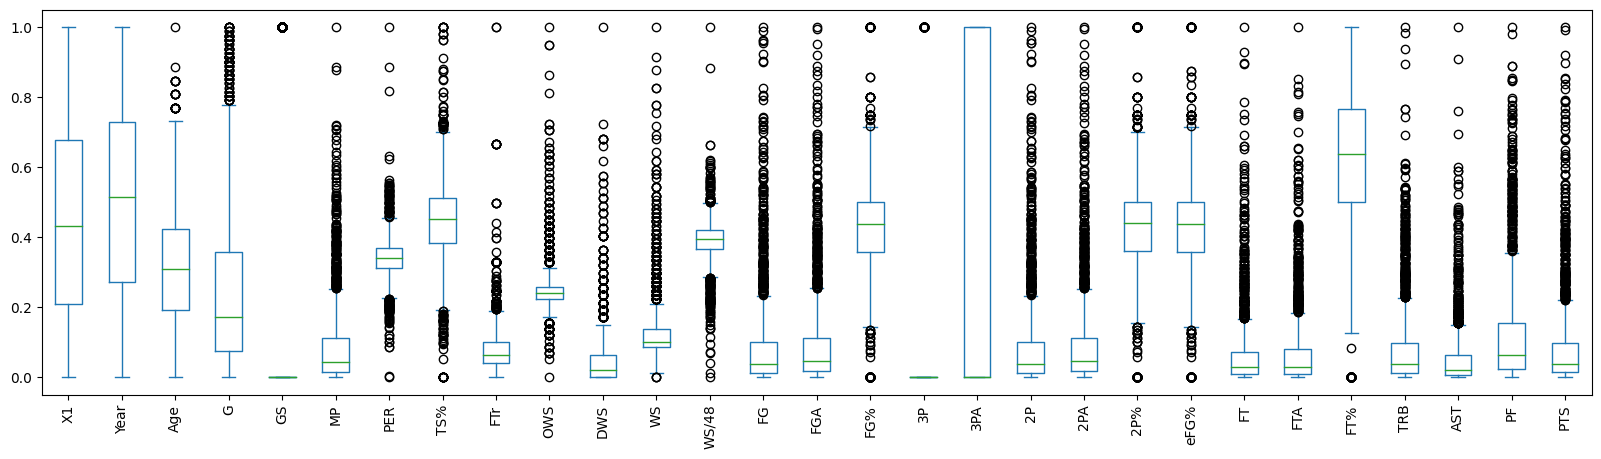

In [ ]:
#Visualización de la normalizacion de min max
df_norm.plot.box(figsize=(20,5), rot=90)

##Standarization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas numéricas
X = df.select_dtypes(include='number')

# Crear una instancia de StandardScaler y ajustarla a los datos
stand_scal = StandardScaler().fit(X)

# Transformar los datos con StandardScaler
array_ss = stand_scal.transform(X)

# Crear un nuevo DataFrame con los datos escalados
df_ss = pd.DataFrame(array_ss, columns = X.columns)

# Mostrar las estadísticas descriptivas del DataFrame escalado
df_ss.describe().T.round(3)


,count,mean,std,min,25%,50%,75%,max
X1,2114.0,-0.0,1.0,-1.662,-0.890,-0.067,0.837,2.027
Year,2114.0,-0.0,1.0,-1.864,-0.865,0.035,0.834,1.833
Age,2114.0,0.0,1.0,-2.096,-0.866,-0.127,0.611,4.302
G,2114.0,0.0,1.0,-1.062,-0.748,-0.330,0.454,3.174
GS,2114.0,0.0,1.0,-0.415,-0.415,-0.415,-0.415,2.412
MP,2114.0,0.0,1.0,-0.758,-0.623,-0.386,0.193,7.857
PER,2114.0,0.0,1.0,-5.498,-0.463,0.013,0.472,10.651
TS%,2114.0,-0.0,1.0,-3.619,-0.508,0.045,0.529,4.495
FTr,2114.0,-0.0,1.0,-1.057,-0.544,-0.254,0.245,11.791
OWS,2114.0,-0.0,1.0,-3.330,-0.367,-0.139,0.088,9.887


<Axes: >

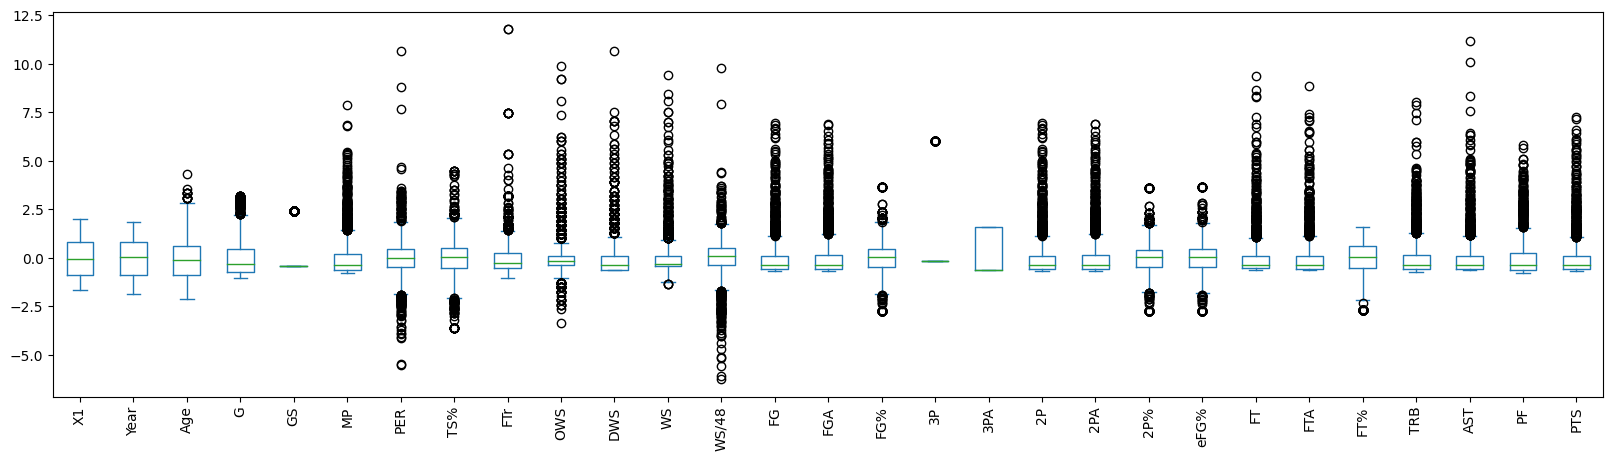

In [ ]:
#Visualización de la normalizacion de standarization
df_ss.plot.box(figsize=(20,5), rot=90)

##Robust Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

# Seleccionar las columnas numéricas
X = df.select_dtypes(include='number')

# Crear una instancia de RobustScaler y ajustarla a los datos
rs = RobustScaler().fit(X)

# Transformar los datos con RobustScaler
array_rs = rs.transform(X)

# Crear un nuevo DataFrame con los datos escalados
df_rs = pd.DataFrame(array_rs, columns = X.columns)

# Mostrar las estadísticas descriptivas del DataFrame escalado
df_rs.describe().T.round(3)


,count,mean,std,min,25%,50%,75%,max
X1,2114.0,0.039,0.579,-0.924,-0.476,0.0,0.524,1.213
Year,2114.0,-0.020,0.589,-1.118,-0.529,0.0,0.471,1.059
Age,2114.0,0.086,0.677,-1.333,-0.500,0.0,0.500,3.000
G,2114.0,0.274,0.832,-0.609,-0.348,0.0,0.652,2.913
GS,2114.0,0.147,0.354,0.000,0.000,0.0,0.000,1.000
MP,2114.0,0.474,1.227,-0.456,-0.290,0.0,0.710,10.109
PER,2114.0,-0.014,1.070,-5.894,-0.509,0.0,0.491,11.378
TS%,2114.0,-0.044,0.964,-3.533,-0.533,0.0,0.467,4.290
FTr,2114.0,0.321,1.267,-1.018,-0.368,0.0,0.632,15.263
OWS,2114.0,0.306,2.195,-7.000,-0.500,0.0,0.500,22.000


<Axes: >

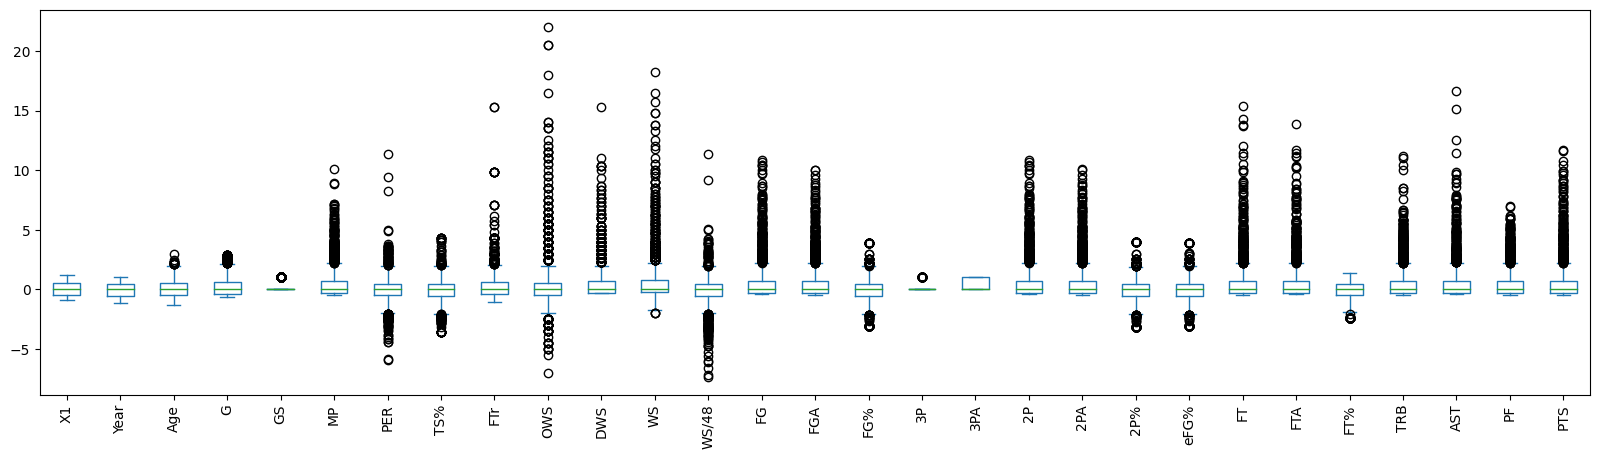

In [ ]:
#Visualización de la normalizacion de RobustScaler
df_rs.plot.box(figsize=(20,5), rot=90)

##Observaciones tecnicas de Escalamiento

- Normalización Min-Max: Esta técnica reescala los valores numéricos de las características a un rango definido, generalmente entre 0 y 1, utilizando la fórmula (x - min) / (max - min). Es útil cuando los datos no siguen una distribución normal o cuando no sabes la distribución de tus datos. Sin embargo, es sensible a los valores atípicos, por lo que si tus datos contienen valores atípicos, es posible que esta técnica no funcione bien.
- Estandarización: Esta técnica reescala los datos para que tengan una media de 0 y una desviación estándar de 1, utilizando la fórmula (x - mean) / std_dev. Es útil cuando los datos siguen una distribución normal. No es tan sensible a los valores atípicos como la normalización Min-Max.
- Escalado Robusto: Esta técnica utiliza estadísticas robustas como la mediana y el rango intercuartil (IQR) para escalar los datos. Es útil cuando los datos contienen valores atípicos y deseas reducir su impacto. Al igual que la estandarización, reescala los datos a una distribución con media 0, pero a diferencia de la estandarización y la normalización Min-Max, no restringe los valores a un rango específico.

Al momento de trabajar con bases de datos bastante extensas como esta de la NBA me imagino que es mejor usar Robust Scaling al ser menos sensible a valores atipicos.


##P2. Discretizacion.


- cut: Este método se utiliza para segmentar y ordenar los datos en contenedores. Esta función también es útil para convertir una variable continua en una variable categórica. Puedes especificar el número de contenedores o los límites de los contenedores. Los contenedores son inclusivos por defecto.
- qcut: Este método es similar a cut, pero divide los datos en contenedores basados en percentiles de muestra. Es decir, qcut intenta dividir los datos en contenedores de manera que cada contenedor tenga aproximadamente el mismo número de observaciones.
- loc: Este método se utiliza para acceder a un grupo de filas y columnas por etiqueta(s) o una matriz booleana. loc es principalmente basado en etiquetas, pero también se puede utilizar con una matriz booleana.

In [ ]:
# Calcular los cuartiles de la columna PTS
q1 = df['PTS'].quantile(0.25)
q2 = df['PTS'].quantile(0.5)
q3 = df['PTS'].quantile(0.75)
q4 = df['PTS'].quantile(1)

# Crear los intervalos con between & loc
df['PTS_categories_loc'] = 'Q4'
df.loc[df['PTS'] <= q3, 'PTS_categories_loc'] = 'Q3'
df.loc[df['PTS'] <= q2, 'PTS_categories_loc'] = 'Q2'
df.loc[df['PTS'] <= q1, 'PTS_categories_loc'] = 'Q1'

# Crear los intervalos con cut
df['PTS_categories_cut'] = pd.cut(df['PTS'], bins=[0, q1, q2, q3, q4], labels=['Q1', 'Q2', 'Q3', 'Q4'], include_lowest=True)

# Crear los intervalos con qcut
df['PTS_categories_qcut'] = pd.qcut(df['PTS'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

df[['PTS', 'PTS_categories_loc', 'PTS_categories_cut', 'PTS_categories_qcut']]

,PTS,PTS_categories_loc,PTS_categories_cut,PTS_categories_qcut
5834,175.0,Q4,Q4,Q4
6181,96.0,Q4,Q4,Q4
6456,659.0,Q4,Q4,Q4
6457,66.0,Q3,Q3,Q3
6458,593.0,Q4,Q4,Q4
...,...,...,...,...
24606,6.0,Q1,Q1,Q1
24637,18.0,Q2,Q2,Q2
24660,346.0,Q4,Q4,Q4
24677,146.0,Q4,Q4,Q4


En el dataframe de PTS podemos observar como en base a la cantidad de puntos que anota un jugador se le asigna dentro de un cuartil especifico, aquellos que se situan el el cuartil 4

In [ ]:
%%shell
jupyter nbconvert --to html /

[NbConvertApp] Converting notebook / to html
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/jupyter_core/application.py", line 283, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 423, in start
    self.convert_notebooks()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 560, in convert_single_notebook
    output, resources = self.export_single_notebook(
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 488, in export_single_n

CalledProcessError: Command 'jupyter nbconvert --to html /
' returned non-zero exit status 1.